1. EDA Univeriate

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df = df.drop('Insulin', axis=1)
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1


In [6]:
df.shape

(768, 8)

In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


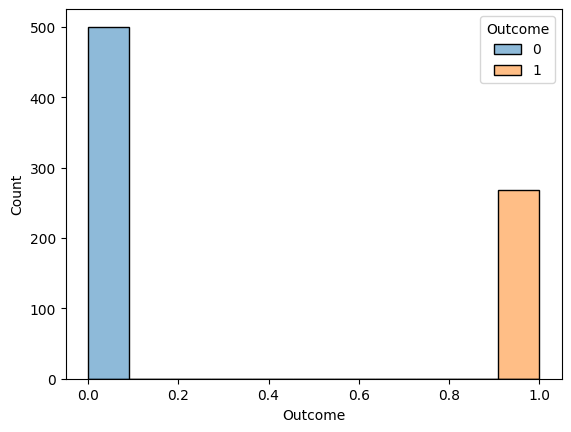

In [8]:
ax = sns.histplot(x = 'Outcome', data = df, hue = 'Outcome')

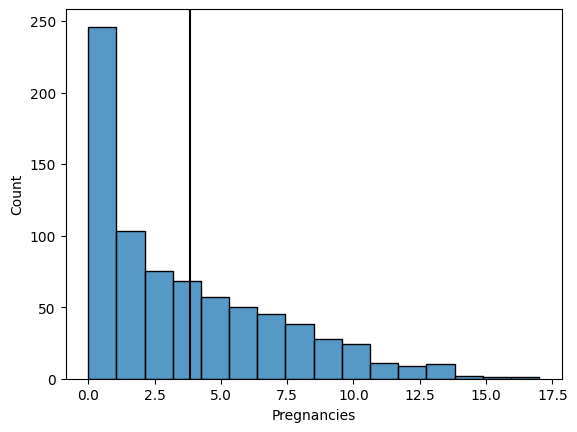

In [ ]:
ax = sns.histplot(x = 'Pregnancies', data = df)
ax.axvline(df['Pregnancies'].mean(), color = 'black')

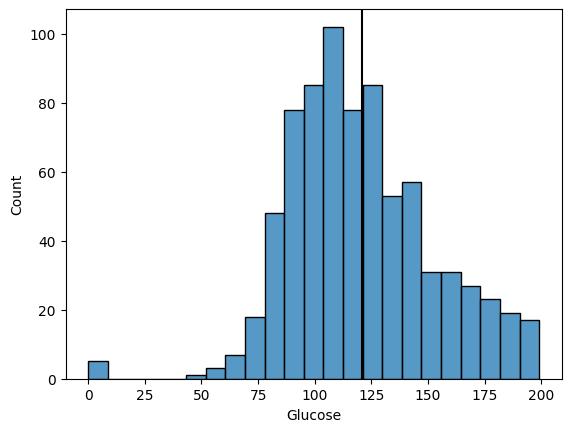

In [ ]:
ax = sns.histplot(x = 'Glucose', data = df)
ax.axvline(df['Glucose'].mean(), color = 'black')

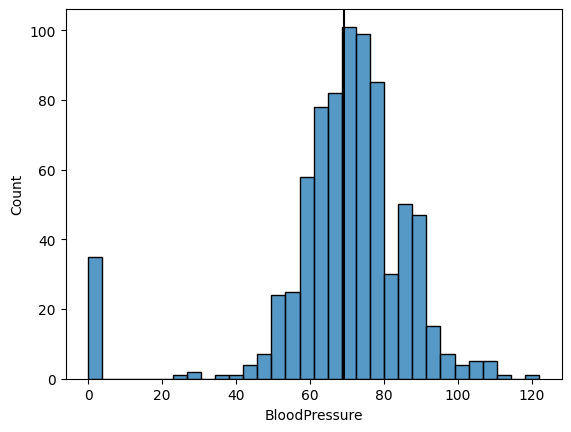

In [ ]:
ax = sns.histplot(x = 'BloodPressure', data = df)
ax.axvline(df['BloodPressure'].mean(), color = 'black')

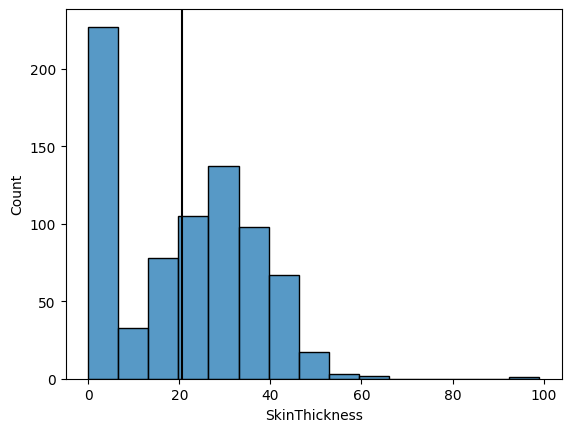

In [ ]:
ax = sns.histplot(x = 'SkinThickness', data = df)
ax.axvline(df['SkinThickness'].mean(), color = 'black')

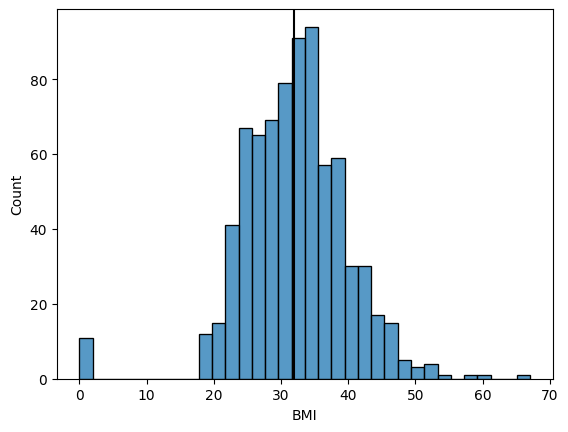

In [ ]:
ax = sns.histplot(x = 'BMI', data = df)
ax.axvline(df['BMI'].mean(), color = 'black')

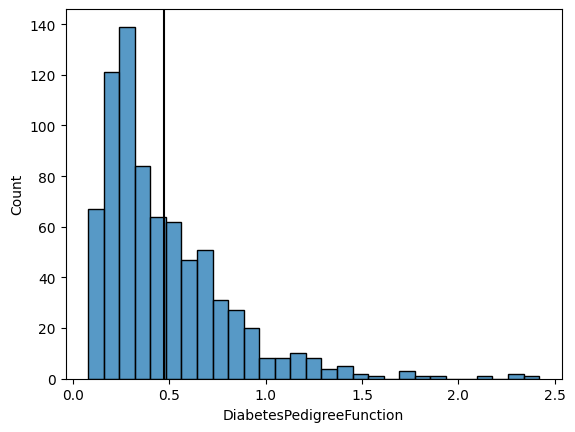

In [ ]:
ax = sns.histplot(x = 'DiabetesPedigreeFunction', data = df)
ax.axvline(df['DiabetesPedigreeFunction'].mean(), color = 'black')

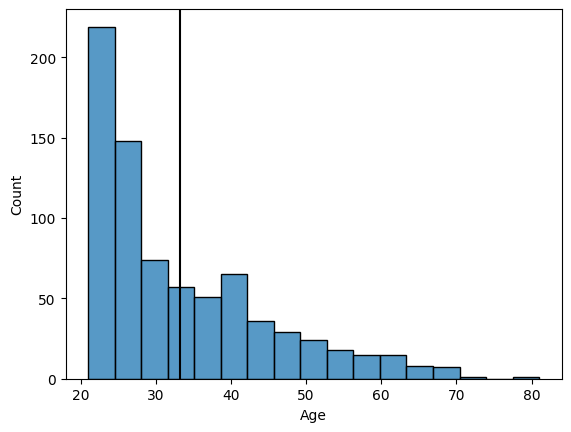

In [ ]:
ax = sns.histplot(x = 'Age', data = df)
ax.axvline(df['Age'].mean(), color = 'black')

2. Bivariate

/tmp/ipython-input-11-2123798833.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Blues')


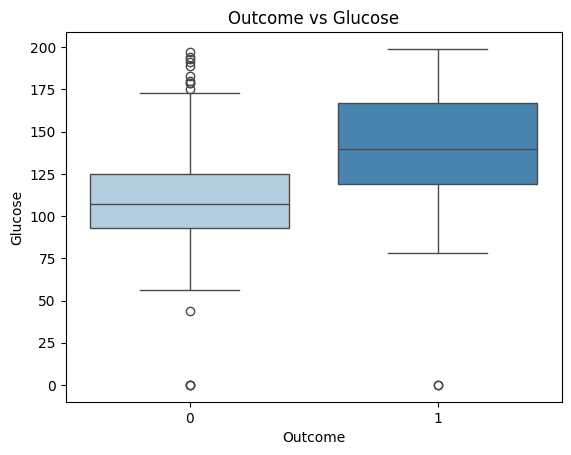

/tmp/ipython-input-11-2123798833.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, palette='Blues')


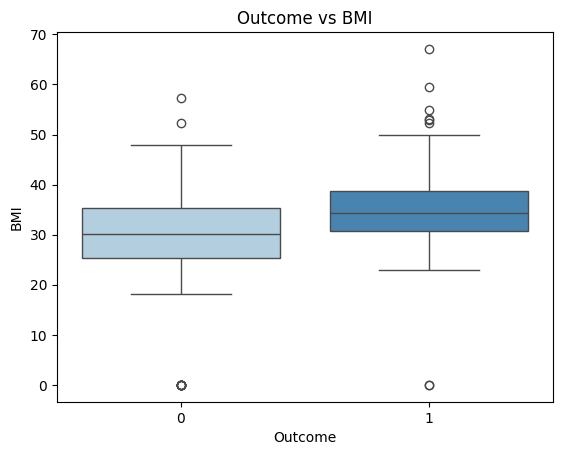

/tmp/ipython-input-11-2123798833.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Age', data=df, palette='Blues')


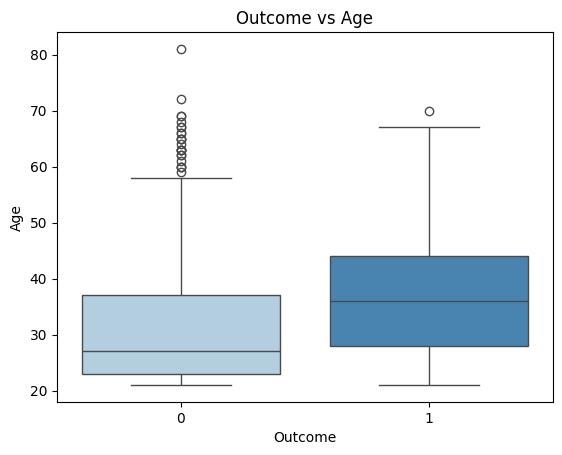

/tmp/ipython-input-11-2123798833.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, palette='Blues')


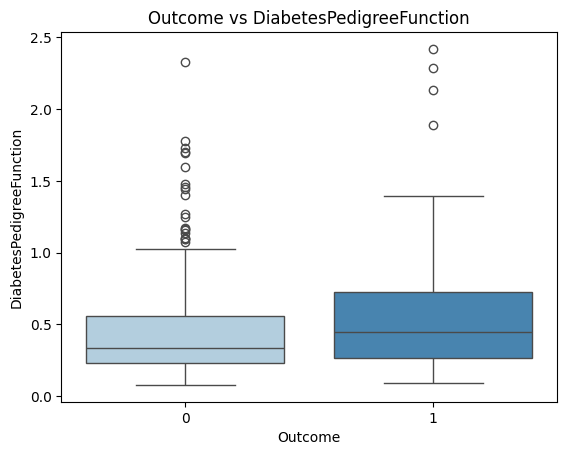

/tmp/ipython-input-11-2123798833.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Pregnancies', data=df, palette='Blues')


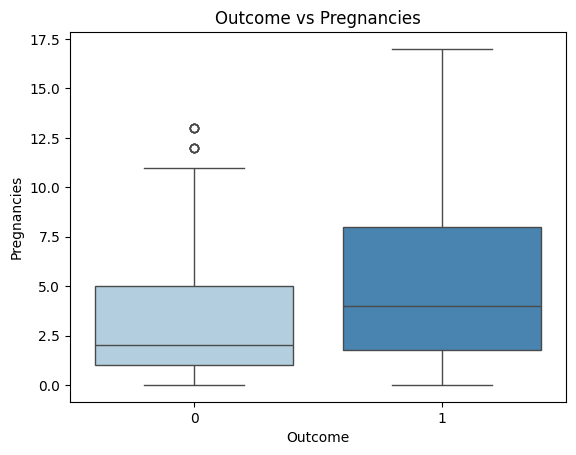

In [11]:
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Blues')
plt.title('Outcome vs Glucose')
plt.show()

sns.boxplot(x='Outcome', y='BMI', data=df, palette='Blues')
plt.title('Outcome vs BMI')
plt.show()

sns.boxplot(x='Outcome', y='Age', data=df, palette='Blues')
plt.title('Outcome vs Age')
plt.show()

sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, palette='Blues')
plt.title('Outcome vs DiabetesPedigreeFunction')
plt.show()

sns.boxplot(x='Outcome', y='Pregnancies', data=df, palette='Blues')
plt.title('Outcome vs Pregnancies')
plt.show()

3. Multivariate

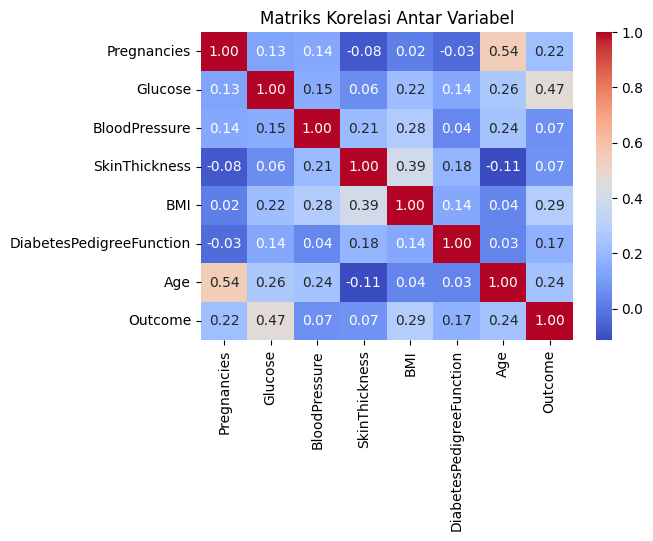

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

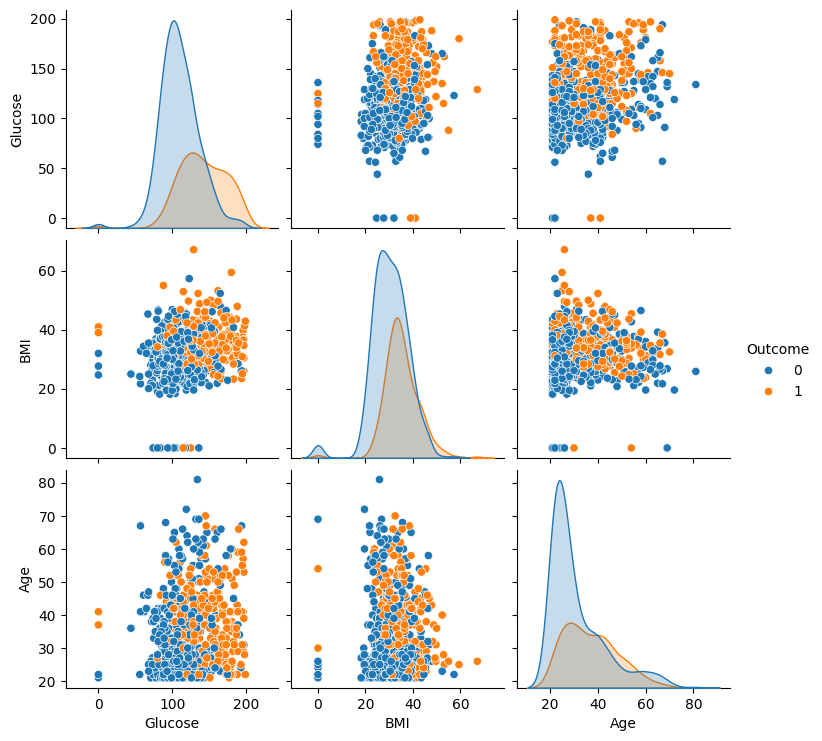

In [13]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')

4. Data processing outlier

In [16]:
# Tangani outlier dengan metode IQR (contoh pada Glucose)
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
df = df[(df['Glucose'] >= lower_bound) & (df['Glucose'] <= upper_bound)]

In [15]:
from sklearn.preprocessing import StandardScaler

# Kolom numerik yang ingin dinormalisasi
num_cols = ['Glucose', 'BMI', 'Age']

# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

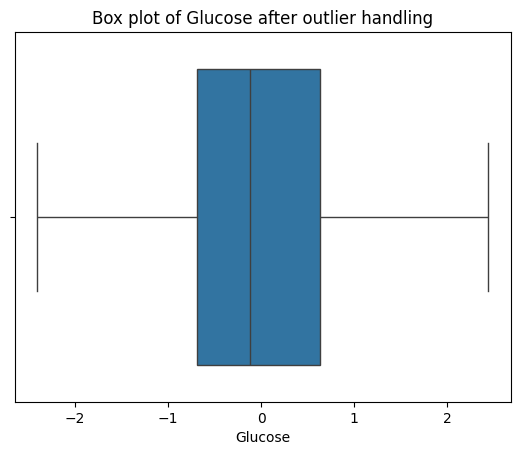

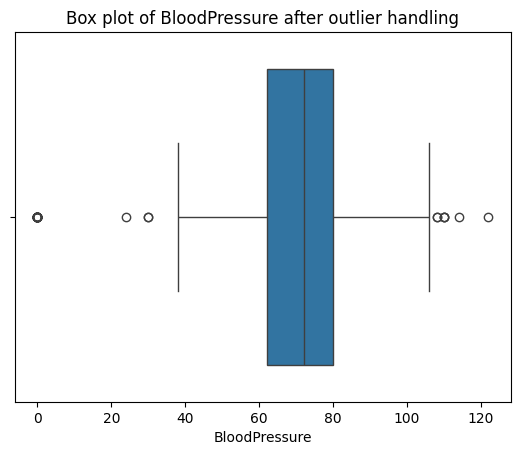

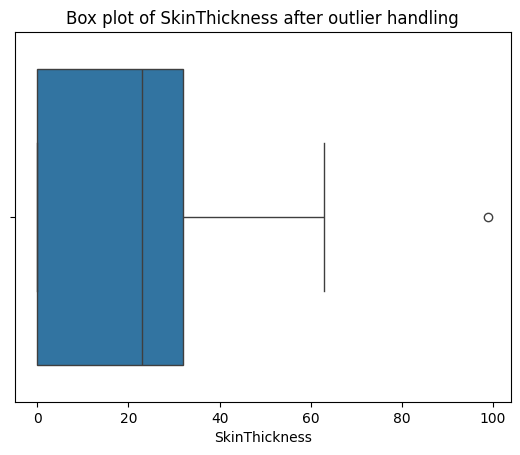

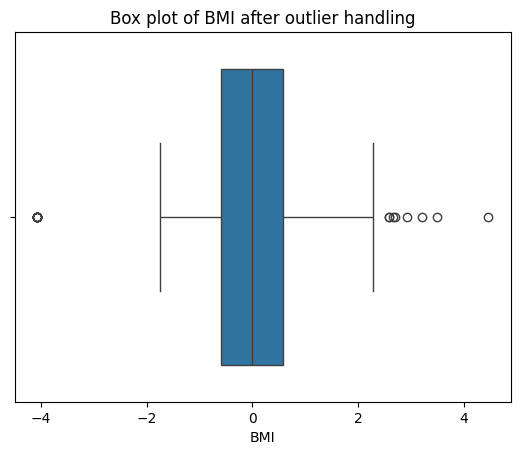

In [18]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

for col in columns_to_check:
    plt.figure() # Create a new figure for each box plot
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col} after outlier handling')
    plt.show()

5. Data Processing Normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to normalize
columns_to_normalize = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the first few rows of the normalized DataFrame
display(df.head())

/tmp/ipython-input-19-1787287265.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.590164,0.353535,0.500745,0.234415,0.483333,1
1,0.058824,0.264516,0.540984,0.292929,0.396423,0.116567,0.166667,0
2,0.470588,0.896774,0.524590,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.290323,0.540984,0.232323,0.418778,0.038002,0.000000,0
4,0.000000,0.600000,0.327869,0.353535,0.642325,0.943638,0.200000,1


:6. Data Processing Imbalance Data Handling (SMOTE)

/tmp/ipython-input-21-1832677677.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=before_smote.index, y=before_smote.values, palette='pastel', ax=axs[0])
/tmp/ipython-input-21-1832677677.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=after_smote.index, y=after_smote.values, palette='muted', ax=axs[1])


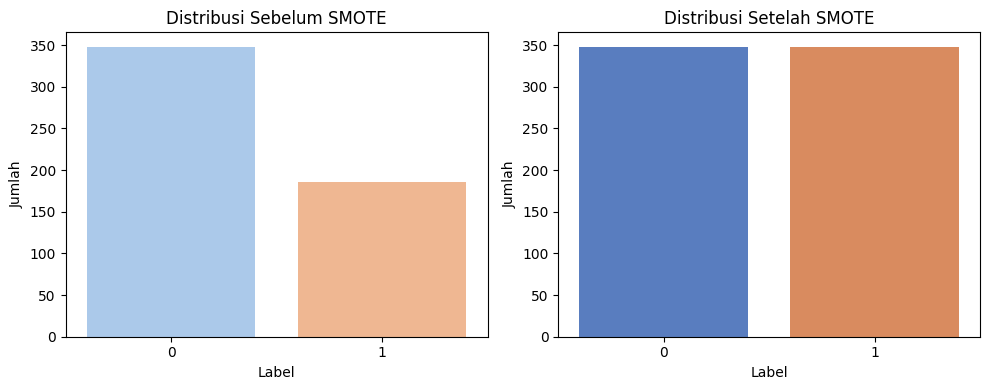

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Terapkan SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Cek distribusi
before_smote = pd.Series(y_train, name='target').value_counts().sort_index()
after_smote = pd.Series(y_train_resampled, name='target').value_counts().sort_index()

# Plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x=before_smote.index, y=before_smote.values, palette='pastel', ax=axs[0])
axs[0].set_title("Distribusi Sebelum SMOTE")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Jumlah")

sns.barplot(x=after_smote.index, y=after_smote.values, palette='muted', ax=axs[1])
axs[1].set_title("Distribusi Setelah SMOTE")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Jumlah")

plt.tight_layout()
plt.show()

7. Modelling

=== Logistic Regression ===
Akurasi: 0.7662337662337663
Confusion Matrix:
 [[120  30]
 [ 24  57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       150
           1       0.66      0.70      0.68        81

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231

Accuracy: 76.62%



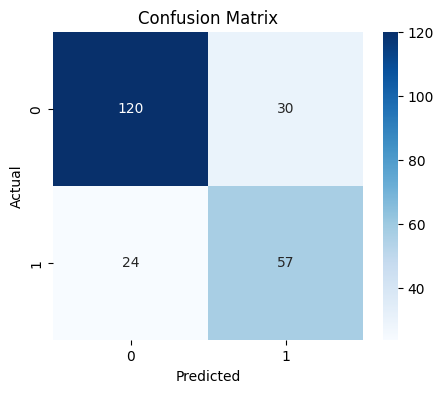

In [24]:
# === 1. Import Library ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# === 2. Load Dataset ===
df = pd.read_csv('diabetes.csv')

# Drop the 'Insulin' column
df = df.drop('Insulin', axis=1)

# === 3. Pisahkan Fitur dan Target ===
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# === 4. Split Train-Test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === 5. Scaling (Standarisasi Fitur) ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 6. SMOTE (Resampling Data Train) ===
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# === 7. Modeling: Logistic Regression ===
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
y_pred_logreg = logreg.predict(X_test_scaled)

# === 9. Evaluasi ===
def evaluate_model(name, y_test, y_pred):
    print(f"=== {name} ===")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
    print()

evaluate_model("Logistic Regression", y_test, y_pred_logreg)

#=== 10. Confussion Matrix ===
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

8. Best Modeling


📌 Logistic Regression
Accuracy: 0.3506
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.35      1.00      0.52        81

    accuracy                           0.35       231
   macro avg       0.18      0.50      0.26       231
weighted avg       0.12      0.35      0.18       231


📌 Decision Tree
Accuracy: 0.5541
              precision    recall  f1-score   support

           0       0.63      0.77      0.69       150
           1       0.26      0.15      0.19        81

    accuracy                           0.55       231
   macro avg       0.44      0.46      0.44       231
weighted avg       0.50      0.55      0.52       231


📌 Random Forest
Accuracy: 0.3853
              precision    recall  f1-score   support

           0       0.70      0.09      0.16       150
           1       0.36      0.93      0.51        81

    accuracy                           0.39       231
   macro avg       0

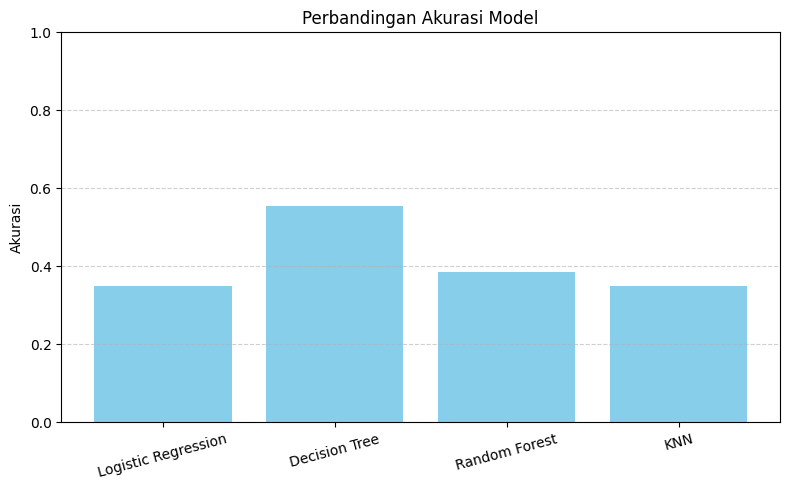

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split # Import train_test_split

# Assuming df is already loaded and preprocessed (Insulin dropped, scaled, outliers handled)
# Split data again to ensure X_test does not have 'Insulin'
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Assuming X_train_resampled and y_train_resampled are available from the previous SMOTE step
# If not, uncomment the following lines to perform scaling and SMOTE again
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# sm = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)


# Daftar model yang akan diuji
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Simpan hasil evaluasi
results = {}

# Loop dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test) # X_test now has the correct columns
    acc = accuracy_score(y_test, y_pred)
    print(f"\n📌 {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc

# Tampilkan model dengan akurasi terbaik
best_model_name = max(results, key=results.get)
print(f"\n Best Model: {best_model_name} (Accuracy: {results[best_model_name]:.4f})")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()